Install Julia if running on Google Colab

In [ ]:
%%capture
%%shell
wget -O - https://raw.githubusercontent.com/JuliaAI/Imbalance.jl/dev/docs/src/examples/colab.sh | bash
#This should take around one minute to finish. Once it does, change the runtime to `Julia` by choosing `Runtime` 
# from the toolbar then `Change runtime type`. You can then delete this cell.

Install needed packages

In [11]:
ENV["JULIA_PKG_SERVER"] = ""

using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
Pkg.add(["DataFrames", "Plots", "Colors", "CategoricalArrays", "Random", 
         "Imbalance", "MLJBase", "TableTransforms", "ScientificTypes", "HTTP"])

using DataFrames
using Plots
using CategoricalArrays
using Random
using Imbalance
using MLJBase: machine, transform
using TableTransforms
using HTTP: download

  Activating project at `~/Documents/GitHub/Imbalance.jl/examples`


   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


### 1. Generate Random Data

In [12]:
rng = Random.default_rng()

type="ColTable"
num_rows = 50
num_features = 5
class_probs = [0.5, 0.2, 0.3]
y_ind = 3

Xy, _ = generate_imbalanced_data(num_rows, num_features; class_probs, type, insert_y=y_ind, rng=42)
X, y = generate_imbalanced_data(num_rows, num_features; class_probs, type, rng=42)

((Column1 = [0.053, 0.066, -0.006, 0.101, -0.025, 0.076, -0.026, 0.305, 0.217, 0.037  …  0.231, 0.007, 0.406, -0.029, 0.119, 0.216, -0.068, -0.071, 0.19, -0.018], Column2 = [-0.136, 0.223, 0.098, 0.233, 0.783, 0.213, 0.117, 1.649, 1.574, 0.383  …  1.624, 0.361, 2.02, 0.043, 0.244, 1.437, 0.669, 0.093, 1.793, 0.172], Column3 = [0.649, 0.703, 0.672, 0.771, 0.69, 0.889, 0.738, 0.516, 0.538, 0.644  …  0.511, 0.826, 0.665, 0.499, 0.469, 0.282, 0.591, 0.823, 0.584, 0.872], Column4 = [0.383, 0.268, 0.518, 0.047, 0.41, 0.433, -0.449, 1.463, 1.591, 0.403  …  1.455, 0.563, 1.422, 0.905, 0.706, 1.393, 0.554, 0.247, 1.44, 0.677], Column5 = [0.736, 0.745, 0.706, 0.699, 0.22, 0.708, 0.651, 1.227, 1.06, 0.625  …  1.001, 0.704, 0.823, 0.684, 0.637, 0.816, -0.265, 0.705, 0.395, 0.633]), CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 1, 0, 0, 2, 2, 0  …  2, 0, 2, 0, 0, 2, 1, 0, 2, 0])

### 2. Apply RandomOversampler

#### Using Imbalance Only

In [13]:
Xover, yover = random_oversample(X, y; ratios = Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng = 42)

((Column1 = [0.053, 0.066, -0.006, 0.101, -0.025, 0.076, -0.026, 0.305, 0.217, 0.037  …  0.5, 0.147, 0.231, 0.347, 0.305, 0.217, 0.374, 0.206, 0.374, 0.147], Column2 = [-0.136, 0.223, 0.098, 0.233, 0.783, 0.213, 0.117, 1.649, 1.574, 0.383  …  1.764, 1.836, 1.624, 1.73, 1.649, 1.574, 1.652, 1.714, 1.652, 1.836], Column3 = [0.649, 0.703, 0.672, 0.771, 0.69, 0.889, 0.738, 0.516, 0.538, 0.644  …  0.443, 0.367, 0.511, 0.317, 0.516, 0.538, 0.703, 0.406, 0.703, 0.367], Column4 = [0.383, 0.268, 0.518, 0.047, 0.41, 0.433, -0.449, 1.463, 1.591, 0.403  …  1.354, 1.426, 1.455, 1.452, 1.463, 1.591, 1.487, 1.598, 1.487, 1.426], Column5 = [0.736, 0.745, 0.706, 0.699, 0.22, 0.708, 0.651, 1.227, 1.06, 0.625  …  1.317, 1.076, 1.001, 1.161, 1.227, 1.06, 0.973, 0.982, 0.973, 1.076]), CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 1, 0, 0, 2, 2, 0  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Using MLJ

In [16]:
naive_model = Imbalance.MLJ.RandomOversampler(ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
mach = machine(naive_model)
Xover, yover = transform(mach, X, y)

((Column1 = [0.053, 0.066, -0.006, 0.101, -0.025, 0.076, -0.026, 0.305, 0.217, 0.037  …  0.5, 0.147, 0.231, 0.347, 0.305, 0.217, 0.374, 0.206, 0.374, 0.147], Column2 = [-0.136, 0.223, 0.098, 0.233, 0.783, 0.213, 0.117, 1.649, 1.574, 0.383  …  1.764, 1.836, 1.624, 1.73, 1.649, 1.574, 1.652, 1.714, 1.652, 1.836], Column3 = [0.649, 0.703, 0.672, 0.771, 0.69, 0.889, 0.738, 0.516, 0.538, 0.644  …  0.443, 0.367, 0.511, 0.317, 0.516, 0.538, 0.703, 0.406, 0.703, 0.367], Column4 = [0.383, 0.268, 0.518, 0.047, 0.41, 0.433, -0.449, 1.463, 1.591, 0.403  …  1.354, 1.426, 1.455, 1.452, 1.463, 1.591, 1.487, 1.598, 1.487, 1.426], Column5 = [0.736, 0.745, 0.706, 0.699, 0.22, 0.708, 0.651, 1.227, 1.06, 0.625  …  1.317, 1.076, 1.001, 1.161, 1.227, 1.06, 0.973, 0.982, 0.973, 1.076]), CategoricalValue{Int64, UInt32}[0, 0, 0, 0, 1, 0, 0, 2, 2, 0  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Using TableTransforms

In [17]:
using Imbalance: TableTransforms.RandomOversampler
naive_model_t = RandomOversampler(y_ind, ratios=Dict(0=>1.2, 1=> 1.2, 2=>1.2), rng=42)
Xyover = Xy |> naive_model_t

(Column1 = [0.053, 0.066, -0.006, 0.101, -0.025, 0.076, -0.026, 0.305, 0.217, 0.037  …  0.5, 0.147, 0.231, 0.347, 0.305, 0.217, 0.374, 0.206, 0.374, 0.147],
 Column2 = [-0.136, 0.223, 0.098, 0.233, 0.783, 0.213, 0.117, 1.649, 1.574, 0.383  …  1.764, 1.836, 1.624, 1.73, 1.649, 1.574, 1.652, 1.714, 1.652, 1.836],
 Column3 = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0  …  2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0],
 Column4 = [0.649, 0.703, 0.672, 0.771, 0.69, 0.889, 0.738, 0.516, 0.538, 0.644  …  0.443, 0.367, 0.511, 0.317, 0.516, 0.538, 0.703, 0.406, 0.703, 0.367],
 Column5 = [0.383, 0.268, 0.518, 0.047, 0.41, 0.433, -0.449, 1.463, 1.591, 0.403  …  1.354, 1.426, 1.455, 1.452, 1.463, 1.591, 1.487, 1.598, 1.487, 1.426],
 Column6 = [0.736, 0.745, 0.706, 0.699, 0.22, 0.708, 0.651, 1.227, 1.06, 0.625  …  1.317, 1.076, 1.001, 1.161, 1.227, 1.06, 0.973, 0.982, 0.973, 1.076],)

### 3. Plot the Results

┌ Warning: Reading one byte at a time from HTTP.Stream is inefficient.
│ Use: io = BufferedInputStream(http::HTTP.Stream) instead.
│ See: https://github.com/BioJulia/BufferedStreams.jl
└ @ HTTP.Streams /Users/essam/.julia/packages/HTTP/SN7VW/src/Streams.jl:240
┌ Info: Downloading
│   source = https://raw.githubusercontent.com/JuliaAI/Imbalance.jl/dev/examples/plot.jl
│   dest = ./plot.jl
│   progress = NaN
│   time_taken = 0.0 s
│   time_remaining = NaN s
│   average_speed = 2.367 MiB/s
│   downloaded = 4.849 KiB
│   remaining = ∞ B
│   total = ∞ B
└ @ HTTP /Users/essam/.julia/packages/HTTP/SN7VW/src/download.jl:132
   Resolving package versions...


  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Project.toml`
  No Changes to `~/Documents/GitHub/Imbalance.jl/examples/Manifest.toml`


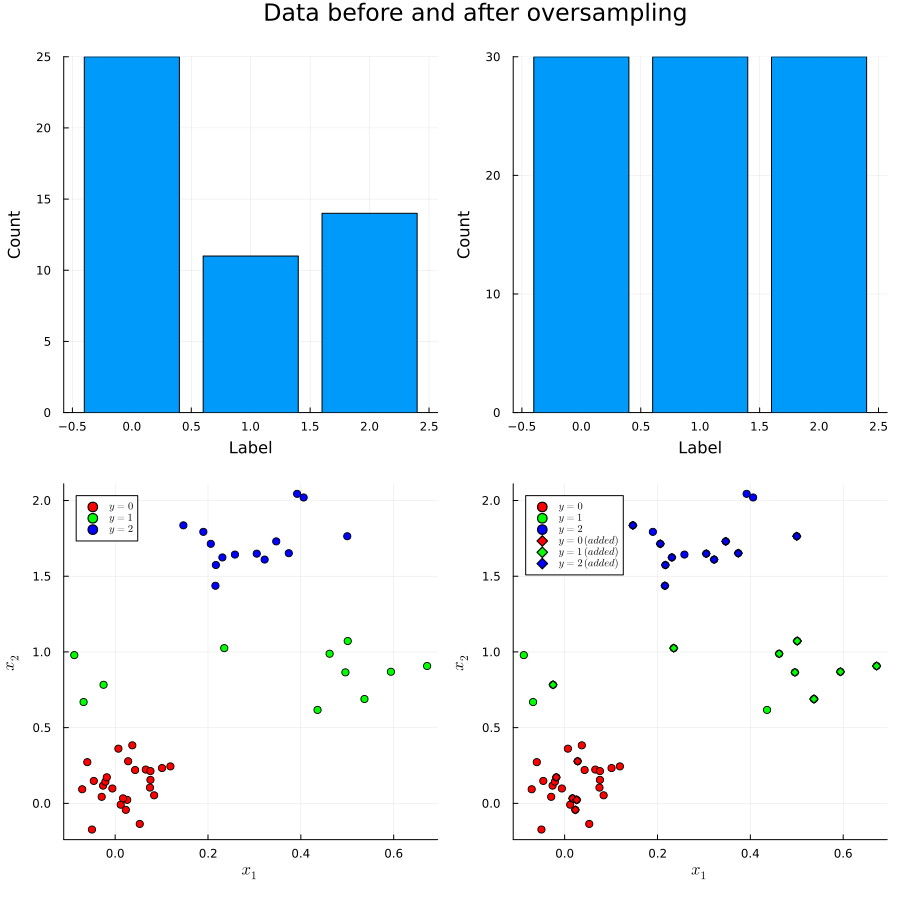

In [18]:
download("https://raw.githubusercontent.com/JuliaAI/Imbalance.jl/dev/examples/plot.jl", "./")
include("plot.jl")                      # provides a plot function to compare results
plot_data(y, yover, X, Xover)

Observe that there is no difference since this is naive random oversampling which operates by simply replicating examples.

Plots.AnimatedGif("/Users/essam/Documents/GitHub/Imbalance.jl/examples/assetss/random_oversample.gif")
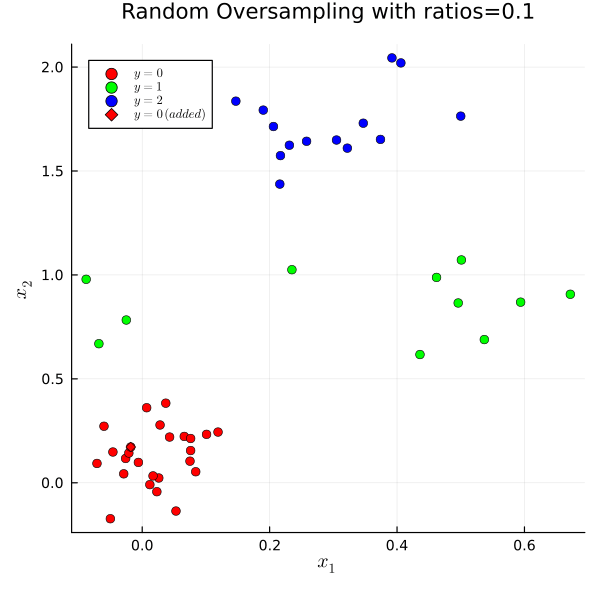

In [20]:
import Logging
Logging.disable_logging(Logging.Warn)

anim = @animate for ratios ∈ 0.1:0.05:3.0
	X_under, y_under = random_oversample(X, y; ratios = ratios, rng = 42)
	plot_data(y, y_under, X, X_under; single_plot=true, 
			  single_plot_title="Random Oversampling with ratios=$ratios")
end
gif(anim, (isdir("./assets")) ? "./assets/random_oversample.gif" : "./random_oversample.gif", fps=3)